In [1]:
# loading cleaned weather dataset
import pandas as pd
import numpy as np
df = pd.read_csv('cleaned_data.csv')
df.head()

,datetime,city,humidity,pressure,temperature,wind_speed,wind_direction,latitude,longitude,weather
0,2017-01-01 00:00:00,Portland,96.0,1017.0,35.582,3.0,160.0,45.523449,-122.676208,foggy
1,2017-01-01 01:00:00,Portland,96.0,1016.0,35.852,2.0,200.0,45.523449,-122.676208,rainy
2,2017-01-01 02:00:00,Portland,99.0,1015.0,35.600,3.0,221.0,45.523449,-122.676208,foggy
3,2017-01-01 03:00:00,Portland,99.0,1014.0,35.312,2.0,170.0,45.523449,-122.676208,rainy
4,2017-01-01 04:00:00,Portland,99.0,1013.0,34.826,1.0,210.0,45.523449,-122.676208,rainy


In [2]:
# filtering denver data
denver_df = df[df['city'] == 'Denver']
# dropping city as only denver data is present and resetting the index
denver_df = denver_df.drop(columns = ['city']).reset_index(drop=True)
denver_df

,datetime,humidity,pressure,temperature,wind_speed,wind_direction,latitude,longitude,weather
0,2017-01-01 00:00:00,36.0,1006.0,37.814,3.0,10.0,39.739151,-104.984703,clear
1,2017-01-01 01:00:00,36.0,1006.0,29.174,2.0,340.0,39.739151,-104.984703,cloudy
2,2017-01-01 02:00:00,68.0,1008.0,28.418,1.0,189.0,39.739151,-104.984703,clear
3,2017-01-01 03:00:00,79.0,1008.0,26.924,1.0,210.0,39.739151,-104.984703,clear
4,2017-01-01 04:00:00,79.0,1008.0,25.142,1.0,189.0,39.739151,-104.984703,clear
...,...,...,...,...,...,...,...,...,...
7988,2017-11-29 20:00:00,18.0,1016.0,61.538,3.0,310.0,39.739151,-104.984703,cloudy
7989,2017-11-29 21:00:00,12.0,1018.0,63.590,6.0,300.0,39.739151,-104.984703,clear
7990,2017-11-29 22:00:00,15.0,1018.0,61.808,3.0,340.0,39.739151,-104.984703,clear
7991,2017-11-29 23:00:00,28.0,1020.0,60.836,1.0,10.0,39.739151,-104.984703,foggy


In [3]:
# creating a function to label data based on weather description
def weather_labels(description):
    if 'clear' in description:
        return 'clear'
    else:
        return 'not clear'

In [4]:
# applying weather_labels function
denver_df['weather'] = denver_df['weather'].apply(weather_labels)
denver_df.weather.value_counts()

weather
clear        4161
not clear    3832
Name: count, dtype: int64

In [5]:
# In Python - the NN work ONLY on quantitative data
x = denver_df.drop(columns=['datetime', 'latitude', 'longitude', 'weather'])
y = denver_df['weather']

In [6]:
import matplotlib.pyplot as plt
import graphviz 
from sklearn.metrics import confusion_matrix

In [7]:
from sklearn.model_selection import train_test_split
# creating disjoint train and test data
# using stratified sampling to ensure that each class is represented proportionally in both sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=123)

In [8]:
y_train.value_counts()

weather
clear        3320
not clear    3074
Name: count, dtype: int64

In [9]:
y_test.value_counts()

weather
clear        841
not clear    758
Name: count, dtype: int64

In [10]:
x_train.dtypes

humidity          float64
pressure          float64
temperature       float64
wind_speed        float64
wind_direction    float64
dtype: object

In [11]:
y_train


3336    not clear
517         clear
1385    not clear
5045    not clear
1929        clear
          ...    
4060        clear
1346        clear
3454        clear
7533    not clear
3582        clear
Name: weather, Length: 6394, dtype: object

In [12]:
y_test

3015    not clear
599         clear
415         clear
1708    not clear
3927        clear
          ...    
5925    not clear
7432    not clear
7499    not clear
315         clear
7677        clear
Name: weather, Length: 1599, dtype: object

In [71]:
from sklearn.preprocessing import LabelEncoder

# Initializing the label encoder
label_encoder = LabelEncoder()

# Encoding the string labels into numerical format
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

print(y_train)
print(y_test)

[1 0 1 ... 0 1 0]
[1 0 0 ... 1 0 0]


In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Defining the number of input features
input_dim = x_train.shape[1]  # Assuming x_train is your training data

# Creating the model
NN_model = Sequential()

# Adding the input layer and one hidden layer with 3 units and activation function
NN_model.add(Dense(units=3, input_dim=input_dim, activation='relu'))

# Adding the output layer with activation function
NN_model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model
NN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Printing the model summary
NN_model.summary()

# Training the model
NN_model.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=(x_test, y_test))


/Users/yeshwanth/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22 (88.00 B)

 Trainable params: 22 (88.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5858 - loss: 34.7564 - val_accuracy: 0.5847 - val_loss: 26.5155
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.6084 - loss: 22.6952 - val_accuracy: 0.5547 - val_loss: 20.0557
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.5761 - loss: 17.9685 - val_accuracy: 0.5347 - val_loss: 16.0014
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.5426 - loss: 14.9558 - val_accuracy: 0.5147 - val_loss: 12.1954
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - accuracy: 0.5284 - loss: 10.8723 - val_accuracy: 0.4884 - val_loss: 7.8477
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.5106 - loss: 6.4338 - val_accuracy: 0.4866 - val_loss: 3.5178
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.4785 - loss: 2.7963 - val_accuracy: 0.4703 - val_loss: 0.9800
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.4795 - loss: 0.8500 - val_accur

In [68]:
pred = NN_model.predict(x_test)

print(pred)
print("prediction shape:", prediction.shape)
print(type(pred))
pred[pred > .5] = 1
pred[pred <= .5] = 0
print(pred)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
[[0.50391054]
 [0.5400373 ]
 [0.49249008]
 ...
 [0.54363763]
 [0.484494  ]
 [0.48687074]]
prediction shape: (1599, 1)
<class 'numpy.ndarray'>
[[1.]
 [1.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]


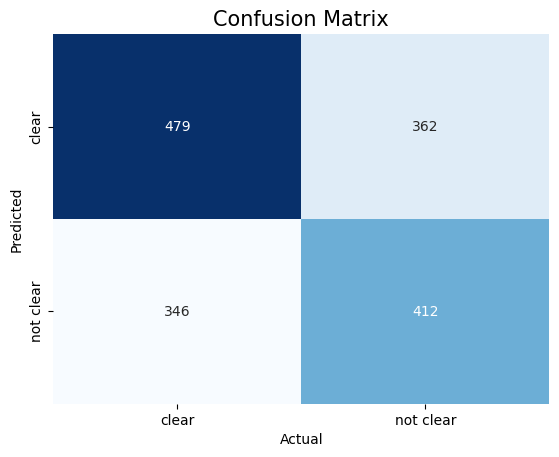

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

labels = y.unique()

NN_matrix = confusion_matrix(y_test, pred)

# if only first row values are annotated then upgrade your seaborn
# pip install seaborn --upgrade
sns.heatmap(NN_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False)
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Actual", fontsize=10)
plt.ylabel("Predicted", fontsize=10)
plt.show()

In [70]:
# calculating accuracy
accuracy = accuracy_score(y_test, pred)
print("accuracy =", accuracy)

accuracy = 0.5572232645403377
